# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** [Francisco Molina]

**Dataset:** [Workation Price Prediction Challenge-MachineHack]

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

I am trying  to predict the cost of a single travel package for one individual. This is a continuous numerical variable that represents the final price a customer pay based on the trip´s features ( such as destination, hotel quality , and flight details).

Problem: Travel prices fluctuate significantly based on complex factors like seasonality, airline availability, and hotel ratings. it is difficult for travel agencies to provide instant, accurate price estimates without time-consuming manual calculations.

Solution: My project solves this by building a Machine Learning model(Regression) that predicts the price per person based on the trip´s details.


### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

1: Travel agencies, tour operators , and online booking platforms are the primary users who would care about this prediction.

2: Decisions:

Automated Pricing: The model allows agencies to instantly price complex package without manual effort, reducing customers wait times. 

Revenue Optimization: It helps decision-makers avoid underpricing ( losing margin) or overpricing ( losing sales) by grounding prices in historical marker data.

Inventory Planning: By understanding which features ( like airline or hotel type) drive prices up, companies can design better package that maximize profit.

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

Based on domain knowledge, the following features are likely to be the strong predictors of Per Person Price:

Package Type: This is likely the strongest predictor: A Luxury or Premium tag implies 5-stars hotels and better services, drastically increasing the price compared to Budget.

Destination: Location determines base costs. Popular or remote destinations often have higher logistical costs than common routes.

Fight Stops: The number of stops (0, 1, or 2) serves as a proxy for flight convenience and cost. Direct fligths are usually more expensive.

Airline: The carrier type( Full service vs Low cost) directly correlates with the ticket portion of the package price.

Itinerary (Duration): While not a direct column, the length of the itinerary ( number of day/nigths) will have a linear relationship with cost-more days equal higher prices.

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [2]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/train.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 21,000 rows, 15 columns

Column names:
['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details', 'Start City', 'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered', 'Cancellation Rules', 'Per Person Price']


I successfully loaded the `train.csv` dataset. I confirmed the dataframe contains 21,000 rows and 15 columns, which matches the expected dimensions for this project. The column names are readable and appear consistent with the problem statement.

In [3]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:

# Display the firtst 5 rows of the dataframe to check the data

df.head()


,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


I decided to display the first 5 rows of the dataset to perform a quick quality check. My goal was to verify that the data matches the column names before I start any analysis.

I confirmed that the values are in the correct columns. For example, the Destination column actually contains city names, and the Price column contains real numbers.

I also noticed that columns like Hotel Details contain very long text. This tells me that I might need to clean or process this text later to make it useful for the model.

In [4]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:

# Display the last 5 rows to ensure data consistency at the end

df.tail()


,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
20995,ae3ae6ca299180d470145a0e154cbf2b,Shimla & Manali Retreat from Delhi,Deluxe,Shimla|Manali|New Delhi,2N Shimla . 3N Manali . 1N New Delhi,Shimla|Manali|New Delhi,15-04-2021,Summit Thistle Villa Resort & Spa:Four|Snow Va...,Mumbai,Not Available,1,3,Mall road | Indira Bunglow | Himalayan Zoo | ...,Cancellation any time after making the 1st pay...,16168.5
20996,6ccc538e3597a909f609fcb2eba9be5e,Bedazzling Kashmir Holiday,Luxury,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 3N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,30-08-2021,The Orchard Retreat & Spa:4.6|The Khyber Himal...,New Delhi,Vistara|Vistara,0,4,Dal Lake | Gondola Point | Avantipura Ruins |...,Cancellation any time after making the 1st pay...,33770.5
20997,d3b412fa94ce5503204024c6db2f60b7,A relaxing week in Colombo (Bentota and Galle ...,Deluxe,Colombo,5N Colombo,Colombo,27-02-2021,Mount Lavinia Hotel-MMT HOLIDAYS SPECIAL:4.0,New Delhi,IndiGo|IndiGo|IndiGo|IndiGo,1,3,Sigiriya Excursion | Nuwara Eliya Excursion,Cancellation any time after making the 1st pay...,29964.0
20998,51d843fb852ec7abde8299fe31111bd5,Awesome North East with Pelling,Deluxe,Darjeeling|Pelling|Gangtok,2N Darjeeling . 2N Pelling . 2N Gangtok,Darjeeling|Pelling|Gangtok,13-01-2022,Ramada by Wyndham Darjeeling Gandhi Road:4.4|T...,New Delhi,IndiGo,1,3,Tiger Hill | Himalayan Mountaineering Institu...,Cancellation any time after making the 1st pay...,28145.5
20999,5ed596587aba74b3f52a59384c04b5a4,"Munnar, Kovalam, Allepey Holiday",Standard,Munnar|Kovalam|Allepey,3N Munnar . 2N Kovalam . 1N Allepey,Munnar|Kovalam|Allepey,30-05-2021,Iceberg Hill Hotel-MMT Holidays Special:3.8|Sa...,New Delhi,IndiGo,2,3,Tata Tea Museum | Eravikulam national park | ...,Cancellation any time after making the 1st pay...,15736.0


I also wanted to check the end of the dataset to make sure the file was not corrupted or cut off.

I looked at the last 5 rows and confirmed that they look just like the first ones. The row numbers go up to 20,999, which matches the total count of 21,000 rows since Python starts counting at zero.

This gives me confidence that the entire file was loaded correctly and there are no weird footer rows or errors at the bottom of the file.

### 2.2 Data Types and Info

In [5]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:

# Get a summary of the dataframe including data types and missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

I used the info command to look at the technical details of my dataframe.

First, I checked the data structure. I can see that I have 21,000 rows and 15 columns, which confirms that my data loaded correctly without losing any records.

Next, I looked at the data types. I was happy to see that my target variable Per Person Price is already a float64 number. This is great because I do not need to convert it before using it for my regression model.

However, I noticed that 12 out of the 15 columns are object types, which means they are text. I know that machine learning models need numbers, so I will have to convert these text columns into numbers later using encoding techniques.

Finally, I looked at the missing values. The output says 21000 non-null for every column, but I know this is misleading. I remember seeing text like Not Available in the previous steps. Python counts that text as valid data, so I know I still need to hunt for those hidden missing values in the next steps.

In [ ]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:

# Generate summary statistics for numerical columns 
# This helps us identify potential outliers and understand the range of prices

df.describe()


,Flight Stops,Meals,Per Person Price
count,21000.000000,21000.000000,21000.000000
mean,0.870286,3.665429,20059.330381
std,0.834989,0.893631,11643.641766
min,0.000000,2.000000,791.000000
25%,0.000000,3.000000,12461.000000
50%,1.000000,3.000000,17765.500000
75%,2.000000,5.000000,25081.375000
max,2.000000,5.000000,171062.500000


I used the describe command to understand the distribution of my numerical features, especially the price.

First, I looked at the price range. I noticed a huge gap between the minimum price of 791 and the maximum price of 171,062. This tells me that the dataset covers a wide variety of options, from very cheap budget trips to super luxury packages.

Next, I checked for skewness by comparing the mean and the median. I saw that the mean price of 20,059 is higher than the median price of 17,765. This indicates a right skew, which means a small number of very expensive trips are pulling the average price up.

Finally, I identified potential outliers. Since the maximum price is so much higher than the 75% percentile of 25,081, I am certain that there are extreme outliers in the data. I will need to handle these later so they do not negatively affect my regression model.

In [8]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

# YOUR CODE HERE:

# Get summary statistics for categorical columns

df.describe(include='object')

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Sightseeing Places Covered,Cancellation Rules
count,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000
unique,21000,2204,5,565,966,565,495,6060,2,314,1714,10
top,e788ab76d9d8cf1e6ed2f139645ca5d1,Holiday in Manali & Chandigarh from Chandigarh,Deluxe,Goa,3N Goa,Goa,19-06-2021,Not Available,New Delhi,Not Available,Not Available,Cancellation any time after making the 1st pay...
freq,1,37,6006,973,453,973,79,2929,13733,4910,1623,17574


I used the describe command with the include object parameter to specifically analyze the text columns in my dataset.

I looked at the unique row to understand how much variety exists in each column. I noticed that columns like Uniq Id and Package Name have a very high number of unique values. This makes sense because they are identifiers, but it means they will likely not be useful for prediction.

On the other hand, I saw that columns like Package Type and Airline have a much smaller number of unique values. This is good news because it means I can easily convert these columns into categories for my model.

I also checked the top and freq rows to see which categories are the most common. This helps me understand the most popular packages and airlines in the dataset.

### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

I obtained this dataset from the course materials, originally sourced from Kaggle.

https://www.kaggle.com/datasets/ipsita001/workation-price-prediction-challengemachinehack?select=Test.csv

Each row in the dataset represents a unique travel package that includes details like the destination, the hotel, and the flight.

I confirmed that I have 15 features (columns) in total to work with. ('Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details', 'Start City', 'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered', 'Cancellation Rules', 'Per Person Price')

My features are a mix of different types. I have numerical features like Per Person Price and Flight Stops. I also have categorical features that are currently text, such as the Airline, Destination, and Package Type. I noticed that most of my data is text-based, so I will need to process it before modeling.

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [9]:
# Define your target variable
TARGET = 'Per Person Price'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: Per Person Price

Basic Statistics:
count     21000.000000
mean      20059.330381
std       11643.641766
min         791.000000
25%       12461.000000
50%       17765.500000
75%       25081.375000
max      171062.500000
Name: Per Person Price, dtype: float64


I focused my analysis on the Per Person Price column since this is what I want to predict.

First, I checked the count and saw it is 21,000. This is good news because it means I have a price value for every single row in the dataset and I am not missing any labels.

Next, I looked at the distribution. I noticed that the mean price is about 20,059, but the median is lower at 17,765. Since the mean is higher than the median, I know the data is skewed to the right.

I also looked at the standard deviation, which is quite high at 11,643. This tells me that the prices are not consistent and vary a lot from the average.

Finally, I checked the range. The minimum price is 791 and the maximum is over 171,000. Seeing that the maximum is so much higher than the 75th percentile of 25,081 confirms that I have significant outliers that I will need to handle later.

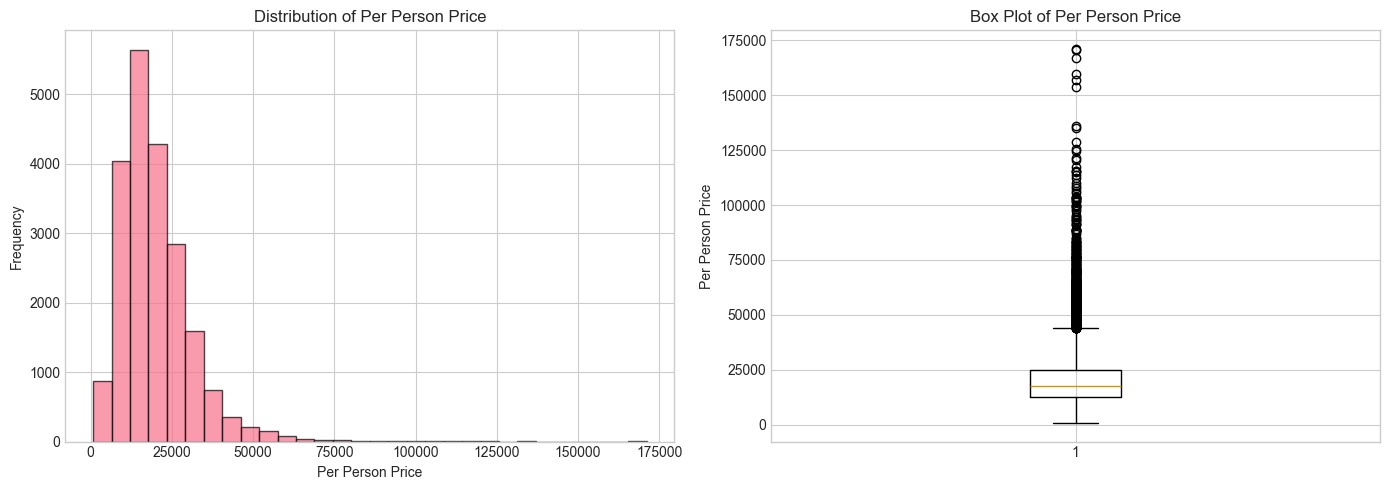


Skewness: 2.56
→ Target is highly skewed. Consider log transform in feature engineering.


In [10]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

With these two graphs i visually confirm the statistics I saw earlier.

First, I looked at the histogram on the left. I saw that the tallest bars are on the left side, between 0 and 25,000. The tail of the graph stretches far out to the right. This visually confirms that the data is right-skewed, meaning most packages are affordable, but a few are extremely expensive.

Next, I examined the boxplot on the right. The black circles above the box represent outliers. I can see a very thick line of these circles extending all the way up to 175,000. This shows me that there is a significant number of high-priced outliers that I will need to manage.

Finally, I noted the skewness score of 2.56. Since this number is well above 0, it proves the data is highly skewed. This tells me that I should apply a log transformation in the future feature engineering step to make the data more normal, which will help my linear regression model perform better.

### 3.2 Data Quality Checks

In [11]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:

# Check for duplicate rows in the dataframe

duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df) ) * 100

# Print the results

print(f"Duplicate rows: {duplicate_count:,} ({duplicate_pct:.2f}%)")

Duplicate rows: 0 (0.00%)


I checked the dataframe for duplicate rows to make sure I did not have any repeated data that could bias my model.

I was happy to see that there are 0 duplicate rows which is 0.0% of the dataset.

This confirms that every row in my data represents a unique travel package, so I do not need to drop any rows at this step. 

In [14]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:

# Calculate missing count and percentage

missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100

# Create a summary DataFrame

missing_summary = pd.DataFrame({'Missing Count': missing_count,
                                 'Missing %': missing_pct})

# Sort by percentage descending and filter only those > 0

missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

missing_only = missing_summary[missing_summary['Missing Count'] > 0]

# Print the missing values summary with a condition

if missing_only.empty:
    print("Great News ! No standar missing values(NaN) were found in the dataset.")
else:
    print("Missing Values Summary:")
    print(missing_only)






Great News ! No standar missing values(NaN) were found in the dataset.


I perfomed a standar check for missing values (NaN) using df.isnull().

As I suspected , the output shows an empty table(or 0 missing values). This technically confirms that there are no empty cells in the dataframe.

However, this result validates my earlier visual inspection: the missing information is not stored as NaN but is hidden inside text string like "Not Available". Therefore, my next major task in Data Cleaning will be to replace those text placeholders with real standard nulls so i can handle properly.

In [15]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

I have completed my initial exploration of the dataset and here is what I found.

Firts, I noticed that my target variable, Per Person Price, is not normally distributed. It is highly rigth-skewed, meaning most travel packages are affordable, but there are a few extreme luxury options thar are very expensive. The boxplot confirmed that I have a significant outliers to handle.

Second, I checked for data quality issues. I was happy to find zero duplicate rows, so the data is unique.

Third, I looked for missing values. While the standar check returned zero errors, I know this is a trick. My early visual inspection revealed that missing information is hidden as a text like Not Available. This was the most interesting  finding  because it means I cannot trust the standar null check and I will need to perform specific cleaning to fix hidden values.

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [ ]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols

# YOUR CODE HERE:


In [ ]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [ ]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:


In [ ]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

In [ ]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

In [ ]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:


In [ ]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:


In [ ]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

In [ ]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

In [ ]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!



In [ ]:
# More exploration...



**What additional insights did you discover?**

[Describe any additional findings from your custom exploration]

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**

[Write your summary here]

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [ ]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:


print(f"Starting shape: {df_clean.shape}")

In [ ]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

In [ ]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = [
    # Add column names to drop here, e.g.:
    # 'id',
    # 'url',
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

**Explain which columns you dropped and why:**

[Describe your reasoning]

### 5.2 Handle Duplicate Rows

In [ ]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:


### 5.3 Handle Missing Values

In [ ]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

In [ ]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:



In [ ]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

**Explain your missing value strategy:**

[Describe what you did for each column and why]

### 5.4 Handle Outliers (if needed)

In [ ]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

In [ ]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:



**Explain your outlier handling strategy (or why you kept them):**

[Describe what you did and why]

### 5.5 Data Type Corrections

In [ ]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

In [ ]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:



## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [ ]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:



**Explain your new features:**

[Describe what features you created and why they might help predict the target]

### 6.2 Encode Categorical Variables

In [ ]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:


In [ ]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:



**Explain your encoding strategy:**

[Describe what encoding methods you used and why]

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [ ]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!



**Explain your additional feature engineering:**

[Describe any additional features you created and your reasoning]

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [ ]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:


### 6.5 Final Sanity Checks

In [ ]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

### 6.6 Save Processed Data

In [ ]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

In [ ]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

[Write a thorough summary of everything you did to clean and transform the data]

**Final feature list for modeling:**

[List all the features you'll use in your models]

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---